## Matplotlib
This is the dedicated library to plot and visually show data. We import it using the following instruction.

In [14]:
import matplotlib.pyplot as plt

In [15]:
import numpy as np # Just to use arrays to plot

By default, `matplotlib` should plot the graph and embed it in Jupyter. If it does not, you can use the magic function 

In [3]:
%matplotlib inline 

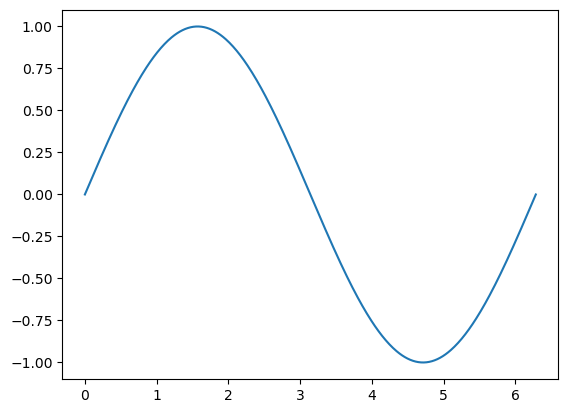

In [19]:
a=np.linspace(0,2*np.pi,500) 
b=np.sin(a)
plt.plot(a,b) # Key plotting method

If you want to plot outside Jupyter, you can use the magic function
```python
%matplotlib #wx, gtk, osx, tk, empty uses default
```

Providing arguments (args) and keyword arguments (kwargs) can change the way we graph.

In [17]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line pro

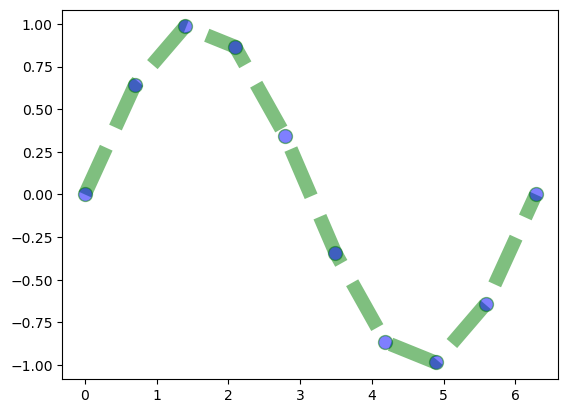

In [16]:
a = np.linspace(0, 2*np.pi, 10)
b = np.sin(a)
plt.plot(a,b,color="green", linestyle="--", marker="o",  alpha=.5, 
        linewidth = 10, markerfacecolor="b", markersize=10)

And multiple graphs can share the same canvas:

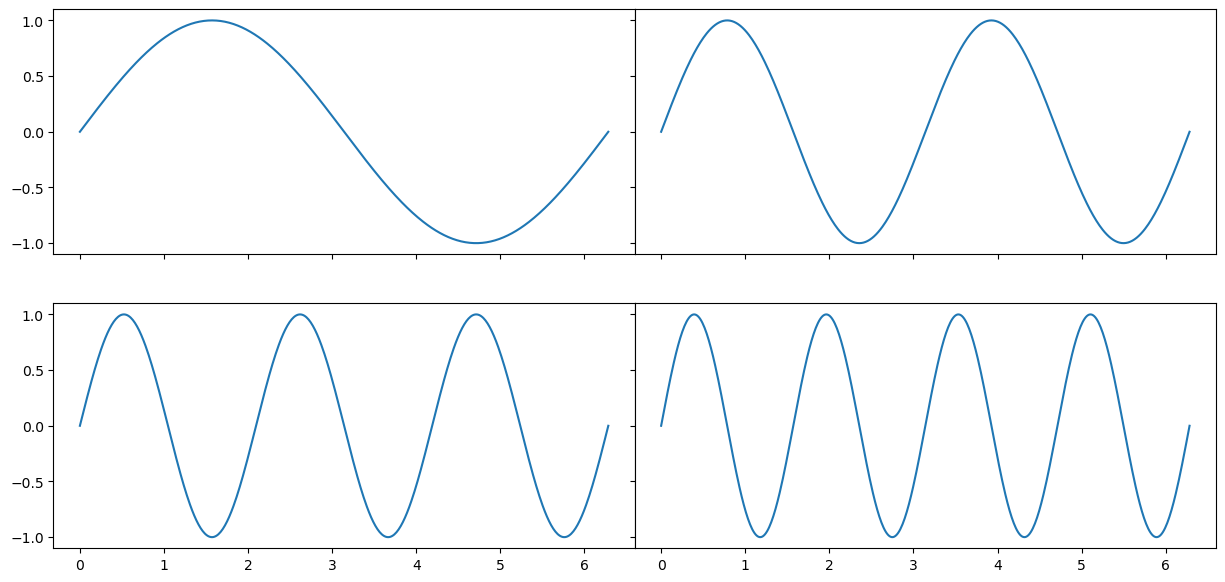

In [27]:
fig, axes=plt.subplots(2,2,figsize=(15,7),sharey=True, sharex=True)
axes[0,0].plot(a,np.sin(a))
axes[0,1].plot(a,np.sin(2*a))
axes[1,0].plot(a,np.sin(3*a))
axes[1,1].plot(a,np.sin(4*a))
fig.subplots_adjust(wspace=0)

To further personalize the disposition in which the graphs will share a canvas, we use `Gridspec`

In [28]:
from matplotlib.gridspec import GridSpec

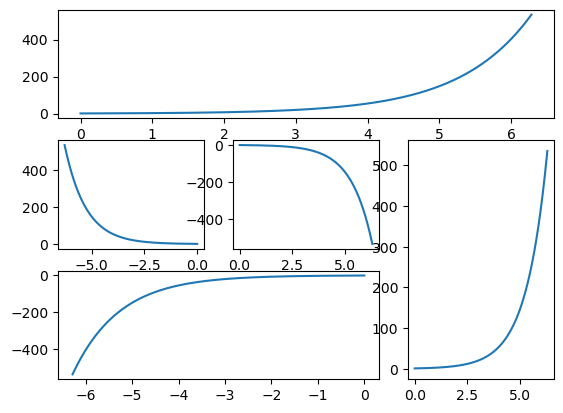

In [29]:
gs = GridSpec(3,3)

plt.subplot(gs[0,:]) #Note el cáracter matricial de gs
plt.plot(a, np.e**a)

plt.subplot(gs[1,0])
plt.plot(-a, np.e**a)

plt.subplot(gs[1,1])
plt.plot(a, -np.e**a)

plt.subplot(gs[2,:2])
plt.plot(-a, -np.e**a)

plt.subplot(gs[1:,2])
plt.plot(a, np.e**a)


## Histograms
With `matplotlib` we can also draw histograms easily.

Text(0, 0.5, 'Frequency')

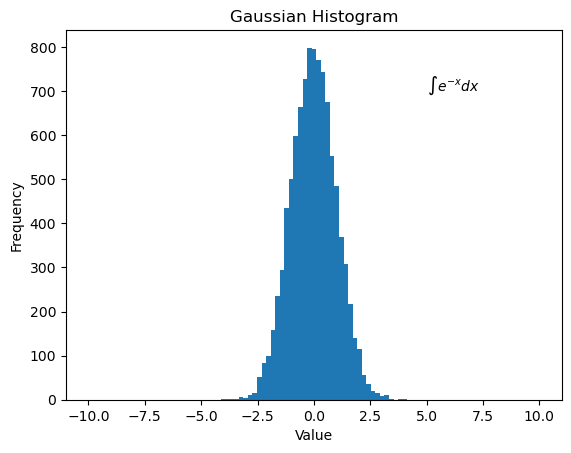

In [36]:
gaussian_numbers = np.random.randn(10000) 
bins = np.linspace(-10, 10, 100)
plt.hist(gaussian_numbers, bins = bins)
plt.text(5,700,r"$\int e^{-x}dx$")
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

## Exercises

- Plot the exponential function.
- Plot the $\pi(x)$ function (number of primes smaller or equal to $x$).
- Find and plot the polynomial of $n$-th order passing through $(n+1)$ randomly generated data.
- Simulate $N$ (large) agents starting at zero, such that in each period each agent randomly decides to move to the right (or left) with a probability of 50%. Draw an histogram of the final positions for $T$ (large) iterations of the agents and try to draw the underlying distribution.

In [ ]:
x = np.linspace(-10, 10, 200)
plt.plot(x, np.exp(x))

In [42]:
from tqdm import tqdm

In [1]:
from numba import njit

In [5]:
@njit
def primes(x):
    p = [2]
    for ii in range(3, x + 1):
        isPrime = True
        for prime in p:
            if ii % prime == 0:
                isPrime = False
                break
        if isPrime:
            p.append(ii)
    return p

In [10]:
def primes_native(x):
    p = [2]
    for ii in range(3, x + 1):
        isPrime = True
        for prime in p:
            if ii % prime == 0:
                isPrime = False
                break
        if isPrime:
            p.append(ii)
    return p

In [6]:
p = primes(int(1e6))

In [28]:
subP = p

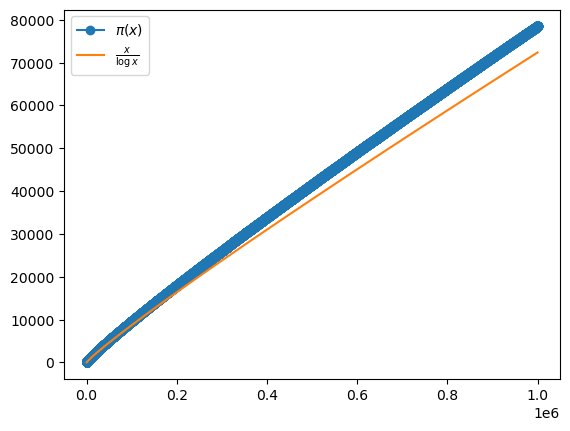

In [29]:
plt.plot(subP, np.arange(1, len(subP) + 1), marker="o", label=r"$\pi(x)$")
x = np.linspace(2, subP[-1], 100)
plt.plot(x, x/np.log(x), label=r"$\frac{x}{\log x}$")
plt.legend()

In [31]:
X = [7, 11, 25, 36, 40, 68]
Y = [1, -1, 3, 0 , 2, 6]

In [41]:
def L(x, j):
    product = 1
    for ii in range(len(X)):
        if ii == j:
            continue
        product *= (x-X[ii])/(X[j]-X[ii])
    return product
def f(x):
    suma = 0
    for ii in range(len(X)):
        suma += Y[ii] * L(x, ii)
    return suma

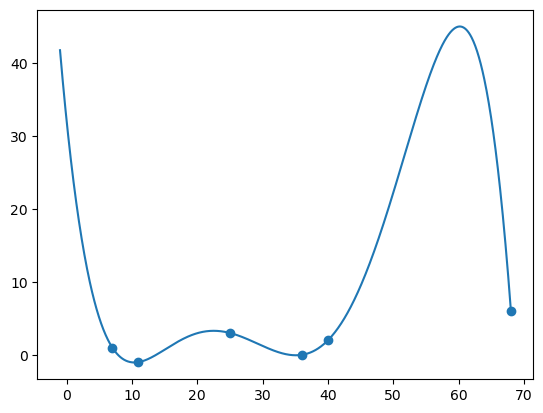

In [51]:
plt.scatter(X,Y)
r = np.linspace(-1, 68, 1000)
plt.plot(r,  f(r))

In [76]:
N = int(1e6)
T = 30
h = 2*np.random.randint(0,2, (N, T)) - 1
h = np.sum(h, axis=1)
sigma = np.var(h)

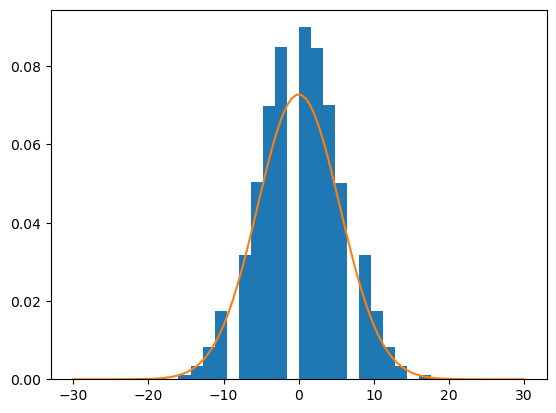

In [88]:
plt.hist(h, bins = 30, density=True)
x = np.linspace(-T, T, 100)
plt.plot(x, 1/(2*np.pi*sigma)**.5 * np.exp(-x**2/(2*sigma)))

## Box Plots, Violin Plots and Pie Charts

In [ ]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate sample data
data1 = np.random.normal(100, 10, 200)
data2 = np.random.normal(80, 20, 200)
data3 = np.random.normal(90, 15, 200)

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 1. Box Plot
box_data = [data1, data2, data3]
ax1.boxplot(box_data, labels=['Data 1', 'Data 2', 'Data 3'])
ax1.set_title('Box Plot')
ax1.set_ylabel('Value')

# 2. Violin Plot
violin_data = [data1, data2, data3]
ax2.violinplot(violin_data, showmeans=True, showmedians=True)
ax2.set_title('Violin Plot')
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Data 1', 'Data 2', 'Data 3'])
ax2.set_ylabel('Value')

# 3. Pie Chart
pie_data = [sum(data1), sum(data2), sum(data3)]
pie_labels = ['Data 1', 'Data 2', 'Data 3']
ax3.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
ax3.set_title('Pie Chart')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
for i, data in enumerate([data1, data2, data3], 1):
    print(f"Data {i} - Mean: {np.mean(data):.2f}, Median: {np.median(data):.2f}, Std Dev: {np.std(data):.2f}")

## Styles

In [ ]:
print(plt.style.available)

In [ ]:
plt.style.use("bmh")

In [ ]:
x = np.linspace(0,1)
plt.plot(x, x, label = r"$y=x$")
plt.plot(x, 2*x, label = r"$y=2x$")
plt.legend()

### Temporary styling

In [ ]:
with plt.style.context(('dark_background')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')

## Colormaps
This is a common visualization technique for 2D scalar fields. For example, we can graph $f(x,y)=x^2+y^2$ in $[0,1]\times[0,1].$

In [ ]:
f=plt.figure(figsize=(8,8))
a = np.linspace(0,1, 100)
A,B=np.meshgrid(a,a)
plt.pcolor(A,B,A**2+B**2, cmap="jet")
plt.colorbar() 
plt.contour(A, B, A**2+B**2, [1], alpha=0.5)
plt.contourf(A, B, A**2+B**2, [.1,.2,.4], alpha=0.5)
test = plt.contourf(A, B, A**2+B**2, [.1,.2,.4], alpha=0.5)

Reference on colormaps: https://matplotlib.org/examples/color/colormaps_reference.html

In [ ]:
path = test.allsegs # List of all contours from test
path

## 3D
### Curves

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Library to plot in 3D
import numpy as np 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t=np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(1+np.cos(t),np.sin(t),2*np.sin(t/2)) 
plt.show()

### Surfaces

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=np.linspace(-2,2)
y=np.linspace(-2,2)
X,Y=np.meshgrid(x,y) 
ax.plot_surface(X,Y,(2+np.cos(np.pi*X))*np.sin(np.pi*Y))
plt.show()

In [ ]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=np.linspace(-2,2,200)
y=np.linspace(-2,2,200)
X,Y=np.meshgrid(x,y) 

surf=ax.plot_surface(X,Y,(2+np.cos(np.pi*X))*np.sin(np.pi*Y), cmap=cm.inferno)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Error graphs

In [ ]:
x=np.linspace(0,10)
error_x=np.random.uniform(0,1)

f=plt.figure(figsize=(10,8))
plt.errorbar(x, x**3, yerr=30, xerr=error_x,  linestyle="none", marker="o", markerfacecolor="k", 
         markersize=5, ecolor="grey", capsize=3)
plt.grid() 

## Projections

In [ ]:
f=plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')

theta=np.linspace(0, 2*np.pi)
r=2*(1-np.cos(theta))

ax.plot(theta, r)
ax.grid(True)

In [ ]:
a=np.linspace(1,100)
b=10**a
f=plt.figure(figsize=(12,8))
gs = GridSpec(2,2)

plt.subplot(gs[0,0])
plt.semilogy(a,b)

plt.subplot(gs[0,1])
plt.semilogx(b, a)

plt.subplot(gs[1,:])
plt.loglog(b, b)

## Image Analysis

In [ ]:
import matplotlib.image as mpimg

In [ ]:
img=mpimg.imread('pleyadesM45.jpg') #Read the image

In [ ]:
print(img)
print(img.shape)

In [ ]:
plt.imshow(img)

In [ ]:
lum_img = img[:,:,0] # Red
print(lum_img)
print(lum_img.shape)
plt.imshow(lum_img)

In [ ]:
lum_img = img[:,:,1] # Green
plt.imshow(lum_img)

In [ ]:
lum_img = img[:,:,2]
plt.imshow(lum_img)

In [ ]:
lum_img = img[:,:,2]
f=plt.figure(figsize=(8,8))
result=plt.imshow(lum_img)
result.set_cmap('coolwarm')
plt.colorbar()

### Exercise
- Try to hide all "bright" stars from the previous image.
- Do you have any idea about how to count the number of stars in this image?

## Image interpolation

In [ ]:
from PIL import Image
img = Image.open('pleyadesM45.jpg')
img.thumbnail((100, 100)) 

imgplot = plt.imshow(img)

In [ ]:
imgplot = plt.imshow(img, interpolation="nearest")

In [ ]:
imgplot = plt.imshow(img, interpolation="bicubic")

## Image Convolution

In [ ]:
#Define some example kernels
kernels = {
    "Identity": np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]]),
    "Edge Detection": np.array([[-1, -1, -1],
                                [-1,  8, -1],
                                [-1, -1, -1]]),
    "Sharpen": np.array([[0, -1,  0],
                         [-1, 5, -1],
                         [0, -1,  0]]),
    "Box Blur": np.array([[1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9]]),
    "Gaussian Blur": np.array([[1/16, 2/16, 1/16],
                               [2/16, 4/16, 2/16],
                               [1/16, 2/16, 1/16]])
}

In [ ]:
from scipy.signal import convolve2d # Method for doing convolutions

In [ ]:
img=mpimg.imread('pleyadesM45.jpg') #Read the image

In [ ]:
convolved = convolve2d(img, kernels["Identity"], 
                       mode='same', boundary='symm') # An error

In [ ]:
img2 = np.sum(img, axis=2) /3
img2.shape

In [ ]:
convolved = convolve2d(img2, kernels["Identity"], 
                       mode='same', boundary='symm') # An error

In [ ]:
def apply_and_display_convolution(image, kernel_name):
    kernel = kernels[kernel_name]
    
    # Apply convolution
    convolved = signal.convolve2d(image, kernel, mode='same', boundary='symm')
    
    # Display results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(convolved, cmap='gray')
    ax2.set_title(f'After {kernel_name} Convolution')
    ax2.axis('off')
    
    plt.show()
    
    # Display the kernel
    print(f"{kernel_name} Kernel:")
    print(kernel)

In [ ]:
apply_and_display_convolution(img2, "Identity")

In [ ]:
apply_and_display_convolution(img2, "Edge Detection")

In [ ]:
apply_and_display_convolution(img2, "Sharpen")

In [ ]:
apply_and_display_convolution(img2, "Box Blur")

In [ ]:
apply_and_display_convolution(img2, "Gaussian Blur")

## Animations

In [ ]:
# Probably does not work natively on Jupyter
import matplotlib.animation as animation 
def anima(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])
    return line,
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
t=np.linspace(-2*np.pi,2*np.pi,100)
x=1+np.cos(t)
y=np.sin(t)
z=2*np.sin(t/2)
data=np.vstack((x,y,z)) 

ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

lines, = ax.plot([],[],[], "r-")
line_ani = animation.FuncAnimation(fig, anima, 100, fargs=(data, lines),
    interval=100, blit=True)
plt.show()

In [ ]:
def just_a_point(num,data,line):
    line.set_data(data[0][num], data[1][num])
    line.set_3d_properties(data[2][num])    
    return line,

def clear(line):
    line.set_data([], [])
    line.set_3d_properties([])    
    return line,

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
t=np.linspace(-2*np.pi,2*np.pi,100)
x=1+np.cos(t)
y=np.sin(t)
z=2*np.sin(t/2)
data=np.vstack((x,y,z)) 

ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

lines, = ax.plot([],[],[], "r-")
lines2, = ax.plot([],[],[], "ro")
line_ani2 = animation.FuncAnimation(fig, just_a_point, 100, fargs=(data, lines2),
                                   interval=100, blit=False, init_func=lambda: clear(lines2))
line_ani = animation.FuncAnimation(fig, anima, 100, fargs=(data, lines),
    interval=100, blit=False)

plt.show()

## Exercise
- Try to animate the random walk that you previously did.